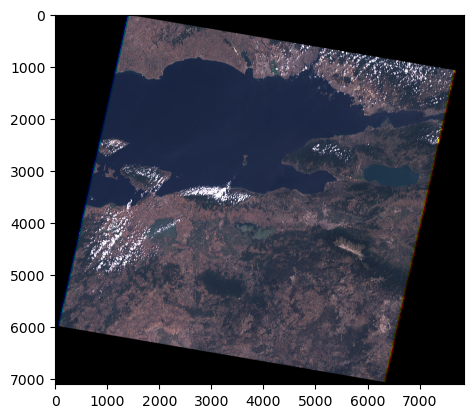

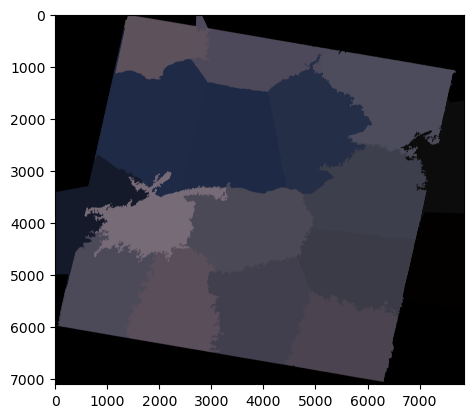

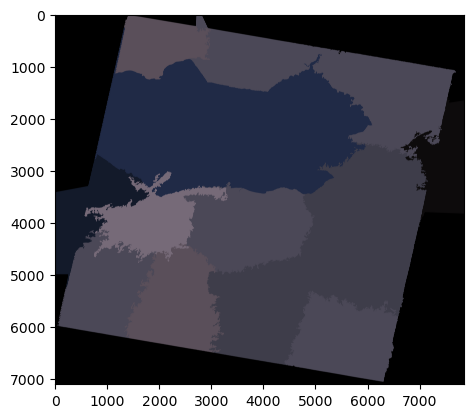

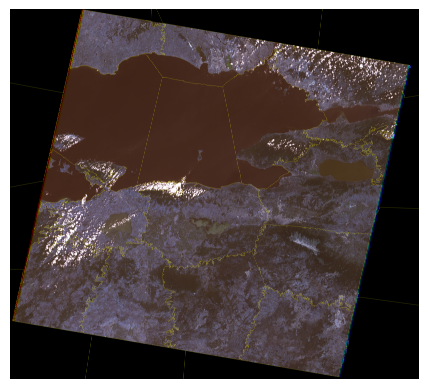

In [12]:

import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from math import pi, sqrt, exp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from PIL import  Image
import matplotlib.image as mpimg


#Görüntüleri okuyup işlevi başlatmak
blue= cv2.imread("B1.tif",0)
green= cv2.imread("B2.tif",0)
red= cv2.imread("B3.tif",0)

    
#Renk bantlarını birleştirip rgb görüntü elde etmek ve göstermek
image = cv2.merge((red, green, blue)) 
imgplot = plt.imshow(image)
plt.show()
    
#K means küme sayısı
kume = 6
    
#Skimage slic kullanarak segementlere ayırma işlemi
segments = slic(image, n_segments=25, compactness=28, sigma=2.0)
    
#Bölütlenmiş görüntüyü oluşturma işlemi
#görüntünün kendi boyutu kadar 0lar içeren bir matris tanımlayıp sonra benzersiz olan süperpixelli görüntüdeki elemanları dönüyor
#daha sonra pixelli görüntüdeki eleman numpy dizisinde sıfır değilse indis değişkenine atıyor, 
#sonra ise ana görüntüde bu indis değerlerini kullanıp ortalamalarıyla out isimli bir diziyi doldurup görüntüyü elde ediyor.
out = np.zeros_like(image)
for segment in np.unique(segments):
    indices = np.nonzero(segments == segment)
    out[indices] = np.mean(image[indices], axis=0)

plt.imshow(out)
plt.show()
    
#K means ile kümeleme işlemi
#bölütlenmiş görüntü üzerinde yeniden şekillendirme yapıp k means ile benzer kümeleri yeniden kümelere ayırma işlemi uygulanıyor
out = out.reshape(-1, 3)
kmeans = KMeans(n_clusters=kume).fit(out)
    
#K means ile kümelenmiş görüntünün yeniden düzenlenip ekrana basılması 
#cluster center ile küme merkezleri etiketlenerek birbirinden ayrılıyor ve görüntü, ana görüntünün boyutunda yeniden
#şekillendirilip ekrana basılıyor
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.figure()
plt.imshow(segmented_img.astype(np.uint8))
plt.show()
    
#Süperpixel görüntüsünün ekrana basılması
#hazır kütüphane olan segmentation a görüntü float olarak veriliyor ve süperpikselleri belirgin hale çıkarılıyor.
fig = plt.figure("Superpixels")
ax.imshow(mark_boundaries(img_as_float(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), segments))
plt.axis("off")
plt.show()





